<a href="https://colab.research.google.com/github/TristanPartida/EDP-I/blob/main/ec.de.onda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

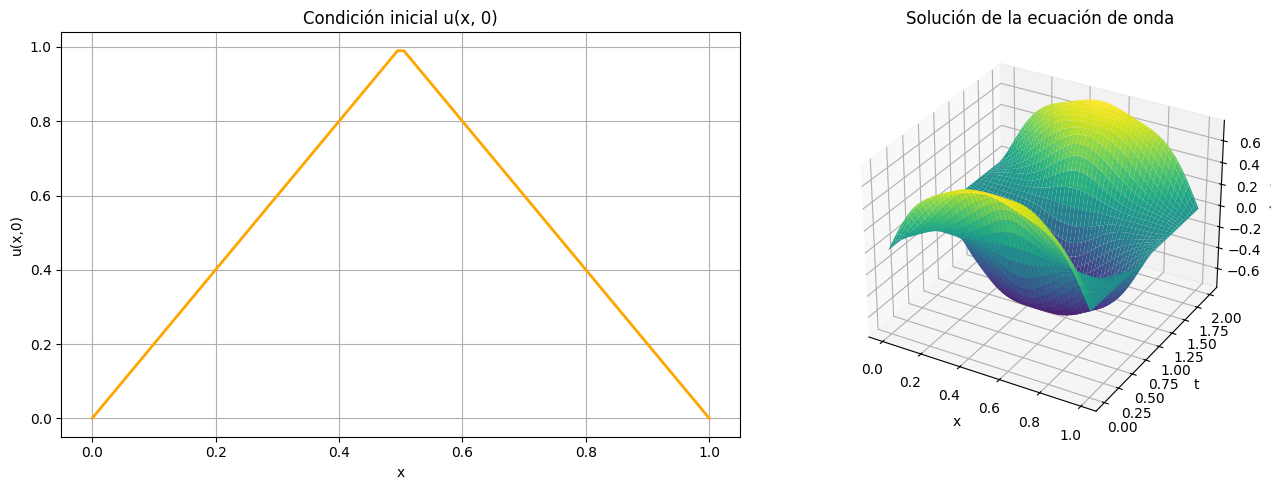

In [7]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --------------------------------------
# PARTE 1: Construcción simbólica de u(x, t)
# --------------------------------------
x, t = sp.symbols('x t')
L, k, c = 1, 1, 1
N = 5  # Número de términos de la serie (solo impares)

# Serie de Fourier truncada (solo n impares)
u_expr = sum(
    (8 * k) / (sp.pi**2 * n**2) * sp.sin(n * sp.pi * x / L) * sp.cos(n * sp.pi * c * t / L)
    for n in range(1, N + 1, 2)
)

# Convertir a función numérica
u_func = sp.lambdify((x, t), u_expr, 'numpy')

# --------------------------------------
# PARTE 2: Evaluación numérica
# --------------------------------------
x_vals = np.linspace(0, L, 100)
t_vals = np.linspace(0, 2, 100)
X_vals, T_vals = np.meshgrid(x_vals, t_vals)
U_vals = u_func(X_vals, T_vals)

# --------------------------------------
# PARTE 3: Condición inicial triangular
# --------------------------------------
def f(x_vals):
    return np.where(x_vals < L/2, (2 * k / L) * x_vals, (2 * k / L) * (L - x_vals))

f_vals = f(x_vals)

# --------------------------------------
# PARTE 4: Graficar todo
# --------------------------------------
fig = plt.figure(figsize=(14, 5))

# Subplot 1: Gráfica del triángulo
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(x_vals, f_vals, color='orange', linewidth=2)
ax1.set_title('Condición inicial u(x, 0)')
ax1.set_xlabel('x')
ax1.set_ylabel('u(x,0)')
ax1.grid(True)

# Subplot 2: Gráfica 3D de u(x,t)
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(X_vals, T_vals, U_vals, cmap='viridis', edgecolor='none')
ax2.set_xlabel('x')
ax2.set_ylabel('t')
ax2.set_zlabel('u(x,t)')
ax2.set_title('Solución de la ecuación de onda')

plt.tight_layout()
plt.show()